# Project to Integrate Python and SQL

### In this project I have connected to SQL with a condition and prepared the data information using the pandas library in Python.

- Calculate the company's daily profit  

- Sales Table -> dbo.FactSales
- Profit -> Sales Amount - TotalCost - DiscountAmount
- There might be more than 1 transaction per day in this table. One option is to use the groupby method from pandas
- Plot the daily profit results

In [2]:
# Import libraries and connect with SQL
import pyodbc
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


connection_data = ("Driver={SQL Server};"
            "Server=LUA;"
            "Database=ContosoRetailDW;")

# Confirm connection
connection = pyodbc.connect(connection_data)
print('Connection completed')

Connection completed


In [4]:
# Read and display relevant data
sales_df = pd.read_sql('SELECT * FROM ContosoRetailDW.dbo.FactSales', connection)
display(sales_df)

,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ETLLoadID,LoadDate,UpdateDate
0,1,2007-01-02,1,209,956,10,1,91.05,198.00,8,0,0.00,1,39.600,728.40,1544.400,1,2010-01-01,2010-01-01
1,2,2007-02-12,4,308,766,2,1,10.15,19.90,4,0,0.00,1,0.995,40.60,78.605,1,2010-01-01,2010-01-01
2,3,2008-01-24,1,156,1175,11,1,209.03,410.00,9,0,0.00,3,61.500,1881.27,3628.500,1,2010-01-01,2010-01-01
3,4,2008-01-13,2,306,1429,10,1,132.90,289.00,8,0,0.00,1,57.800,1063.20,2254.200,1,2010-01-01,2010-01-01
4,5,2008-01-22,2,306,1133,10,1,144.52,436.20,24,0,0.00,3,261.720,3468.48,10207.080,1,2010-01-01,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406084,3406085,2007-10-09,1,121,920,1,1,0.48,0.95,5,0,0.00,0,0.000,2.40,4.750,1,2010-01-01,2010-01-01
3406085,3406086,2007-07-08,1,89,1202,3,1,330.66,998.00,12,0,0.00,0,0.000,3967.92,11976.000,1,2010-01-01,2010-01-01
3406086,3406087,2009-03-06,2,307,1361,24,1,16.56,49.99,18,1,49.99,5,49.990,281.52,849.830,1,2010-01-01,2010-01-01
3406087,3406088,2007-02-04,1,55,539,2,1,760.38,2295.00,9,0,0.00,3,344.250,6843.42,20310.750,1,2010-01-01,2010-01-01


In [5]:
# print min and max dates to explore database size
print(sales_df['DateKey'].max())
print(sales_df['DateKey'].min())

# Create variable profit and check the result 
sales_df['Profit'] = sales_df['SalesAmount'] - sales_df['TotalCost'] - sales_df['DiscountAmount']
sales_df.head(10)

2009-12-31 00:00:00
2007-01-01 00:00:00


,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ETLLoadID,LoadDate,UpdateDate,Profit
0,1,2007-01-02,1,209,956,10,1,91.05,198.00,8,0,0.0,1,39.600,728.40,1544.400,1,2010-01-01,2010-01-01,776.400
1,2,2007-02-12,4,308,766,2,1,10.15,19.90,4,0,0.0,1,0.995,40.60,78.605,1,2010-01-01,2010-01-01,37.010
2,3,2008-01-24,1,156,1175,11,1,209.03,410.00,9,0,0.0,3,61.500,1881.27,3628.500,1,2010-01-01,2010-01-01,1685.730
3,4,2008-01-13,2,306,1429,10,1,132.90,289.00,8,0,0.0,1,57.800,1063.20,2254.200,1,2010-01-01,2010-01-01,1133.200
4,5,2008-01-22,2,306,1133,10,1,144.52,436.20,24,0,0.0,3,261.720,3468.48,10207.080,1,2010-01-01,2010-01-01,6476.880
5,6,2007-07-02,3,200,2365,3,1,183.94,399.99,36,0,0.0,10,399.990,6621.84,13999.650,1,2010-01-01,2010-01-01,6977.820
6,7,2007-11-19,4,310,1016,5,1,68.06,148.00,6,0,0.0,2,44.400,408.36,843.600,1,2010-01-01,2010-01-01,390.840
7,8,2008-04-10,2,307,138,15,1,229.93,499.99,9,0,0.0,1,99.998,2069.37,4399.912,1,2010-01-01,2010-01-01,2230.544
8,9,2008-07-14,2,199,1731,12,1,33.32,72.45,24,0,0.0,5,36.225,799.68,1702.575,1,2010-01-01,2010-01-01,866.670
9,10,2009-04-10,4,310,497,24,1,50.47,99.00,18,0,0.0,4,79.200,908.46,1702.800,1,2010-01-01,2010-01-01,715.140


In [6]:
# Sum the daily sales to find the total sales per day
daily_sales_df = sales_df.groupby(['DateKey']).sum()
display(daily_sales_df['Profit'])

DateKey
2007-01-01    4.446594e+06
2007-01-02    4.423362e+06
2007-01-03    4.515993e+06
2007-01-04    4.447113e+06
2007-01-05    4.338266e+06
                  ...     
2009-12-27    5.438840e+06
2009-12-28    5.273078e+06
2009-12-29    5.523555e+06
2009-12-30    5.399371e+06
2009-12-31    5.513426e+06
Name: Profit, Length: 1096, dtype: float64

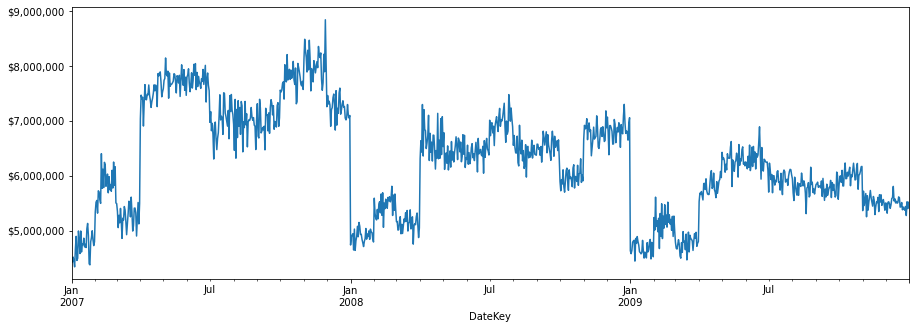

In [7]:
# Graphically display profit by date
plot = daily_sales_df['Profit'].plot(figsize=(15, 5))
plot.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()

The plot clearly display de fall in profit through the years. Further investigation should be performed to investigate this cause. 


#### Conclusion: The pyodbc library makes it really easy and fast to connect with data in SQL. In this case the data was stored in SSMS 2019.  